In [1]:
import cv2

class CompareImage(object):

    def __init__(self, image_1_path, image_2_path):
        self.minimum_commutative_image_diff = 0.5
        self.image_1_path = image_1_path
        self.image_2_path = image_2_path

    def compare_image(self):
        image_1 = cv2.imread(self.image_1_path, 0)
        image_2 = cv2.imread(self.image_2_path, 0)
        commutative_image_diff = self.get_image_difference(image_1, image_2)

        if commutative_image_diff < self.minimum_commutative_image_diff:
#             print("Matched")
            return commutative_image_diff
#         print(commutative_image_diff)
        return 10000 # random failure value

    @staticmethod
    def get_image_difference(image_1, image_2):
        first_image_hist = cv2.calcHist([image_1], [0], None, [256], [0, 256])
        second_image_hist = cv2.calcHist([image_2], [0], None, [256], [0, 256])

        img_hist_diff = cv2.compareHist(first_image_hist, second_image_hist, cv2.HISTCMP_BHATTACHARYYA)
        img_template_probability_match = cv2.matchTemplate(first_image_hist, second_image_hist, cv2.TM_CCOEFF_NORMED)[0][0]
        img_template_diff = 1 - img_template_probability_match

        # taking only 10% of histogram diff, since it's less accurate than template method
        commutative_image_diff = (img_hist_diff / 10) + img_template_diff
        return commutative_image_diff

In [2]:
import matplotlib.pyplot as plt

def show_images(images):
    n = len(images)
    f = plt.figure()
    for i in range(n):
        f.add_subplot(1, n, i + 1)
        plt.imshow(images[i])

    plt.show(block=True)

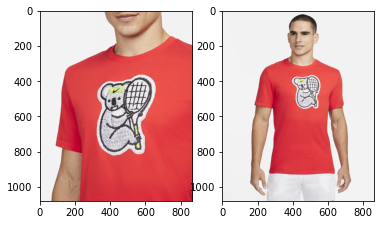

nike2                           nike1               0.3464696629461975


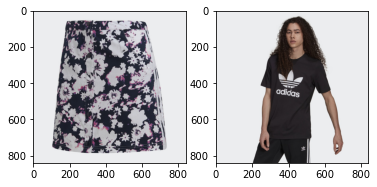

H2044                           real.               0.03891308982750822


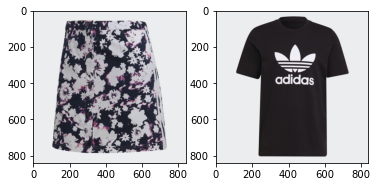

H2044                           origi               0.053065306758058636


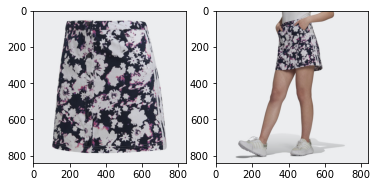

H2044                           H2044               0.038426188548771716


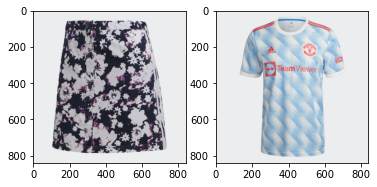

H2044                           shirt               0.049705085731155924


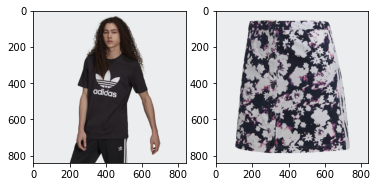

real.                           H2044               0.03891308982750822


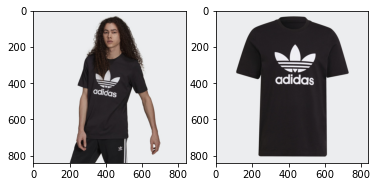

real.                           origi               0.0448629138012097


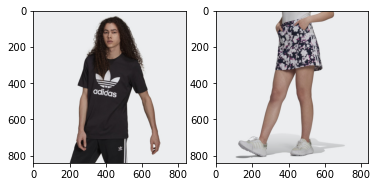

real.                           H2044               0.032385280931347835


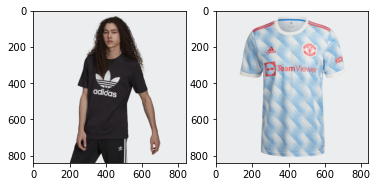

real.                           shirt               0.05192797138109874


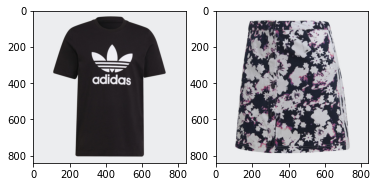

origi                           H2044               0.053065306758058636


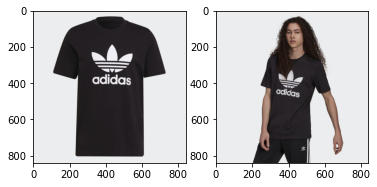

origi                           real.               0.0448629138012097


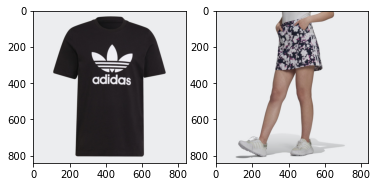

origi                           H2044               0.07260181869746281


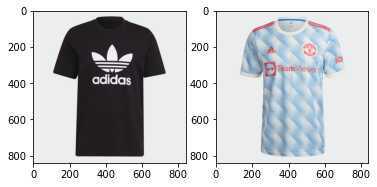

origi                           shirt               0.09029139483126154


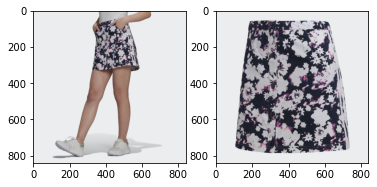

H2044                           H2044               0.038426188548771716


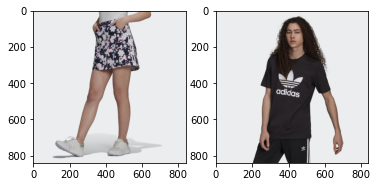

H2044                           real.               0.032385280931347835


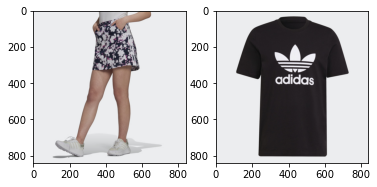

H2044                           origi               0.07260181869746281


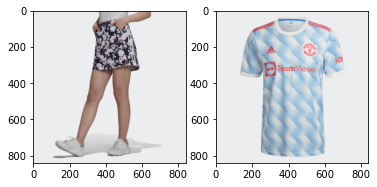

H2044                           shirt               0.02700157052886239


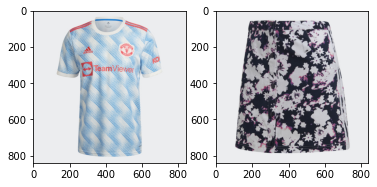

shirt                           H2044               0.049705085731155924


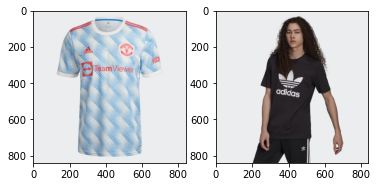

shirt                           real.               0.05192797138109874


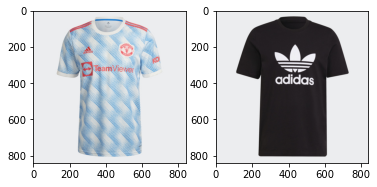

shirt                           origi               0.09029139483126154


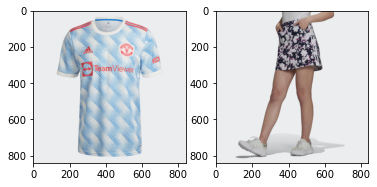

shirt                           H2044               0.02700157052886239


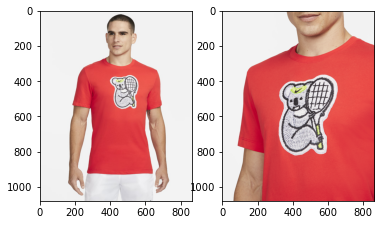

nike1                           nike2               0.3464696629461975


In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

!find . -name '.DS_Store' -type f -delete

directory = "images/"
filenames = [directory+filename for filename in os.listdir(directory)]

for filename1 in filenames:
    for filename2 in filenames:
        if not filename1==filename2:
            compare_image = CompareImage(filename1, filename2)
            image_difference = compare_image.compare_image()
            fname1 = filename1.replace(directory,"")[:5]
            fname2 = filename2.replace(directory,"")[:5]
            if image_difference<0.5:
                img1 = mpimg.imread(filename1)
                img2 = mpimg.imread(filename2)
                show_images([img1,img2])
                print(f"{fname1:<10}                 {fname2:>10}               {image_difference}")

In [4]:
# compare_image = CompareImage('images/nike1.jpeg', 'images/not.jpeg')
# image_difference = compare_image.compare_image()
# print(image_difference)

In [5]:
filenames

['images/nike2.png',
 'images/H20446_01_laydown.jpeg',
 'images/real.jpeg',
 'images/ku2.png',
 'images/original.jpeg',
 'images/H20446_21_model.jpeg',
 'images/shirt_blue.jpeg',
 'images/nike1.jpeg',
 'images/ku1.jpeg']